## Project : Investiage a Dataset
### By Ahmed Sayed

### From Gapminder dataset I chose these three indicators
- Annual Co2 emissions per person
- Life expectancy of females
- Life expectancy of males

--------------

## Import Needed Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Use this function in the data assessing step to see whether your dataframe contains missing values or not
def nan_values(df):
    '''This Function takes your data frame and return you whether it has missing values or not '''
    return df.isna().sum().any()

# This function will help you to know whether your dataframe contains duplicates or not
def duplicate(df):
    '''This function returns you the number of duplicated rows in your data frame'''
    return df.duplicated().sum()

## Data Wrangling

## Gathering Data

In [3]:
df_co2=pd.read_csv('co2_emissions_tonnes_per_person.csv')
df_female=pd.read_csv('life_expectancy_female.csv')
df_male=pd.read_csv('life_expectancy_male.csv')

-----

## Assessing Data

In [4]:
display(df_co2.head(2))
display(df_female.head(2))
df_male.head(2)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.238,0.29,0.406,0.345,0.28,0.253,0.262,0.245,0.247,0.254
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.470,1.56,1.790,1.690,1.69,1.900,1.600,1.570,1.610,1.590


,country,1950,1951,1952,1953,1954,1955,1956,1957,1958,...,2090,2091,2092,2093,2094,2095,2096,2097,2098,2099
0,Afghanistan,28.5,28.7,29.2,29.7,30.2,30.7,31.2,31.7,32.2,...,79.3,79.4,79.5,79.7,79.8,79.9,80.0,80.2,80.3,80.4
1,Albania,55.2,55.3,55.7,56.3,56.9,57.7,58.7,59.8,60.9,...,88.4,88.6,88.7,88.8,88.9,89.0,89.1,89.2,89.3,89.4


,country,1950,1951,1952,1953,1954,1955,1956,1957,1958,...,2090,2091,2092,2093,2094,2095,2096,2097,2098,2099
0,Afghanistan,27.0,27.2,27.7,28.2,28.7,29.2,29.7,30.2,30.7,...,75.2,75.3,75.5,75.6,75.8,75.9,76.1,76.2,76.4,76.5
1,Albania,53.2,53.4,54.0,54.7,55.4,56.2,57.2,58.2,59.2,...,86.5,86.6,86.7,86.8,86.9,87.0,87.1,87.2,87.3,87.4


In [5]:
display(df_co2.dtypes)
print('-'*20)
display(df_female.dtypes)

country     object
1800       float64
1801       float64
1802       float64
1803       float64
            ...   
2014       float64
2015       float64
2016       float64
2017       float64
2018       float64
Length: 220, dtype: object

--------------------


country     object
1950       float64
1951       float64
1952       float64
1953       float64
            ...   
2095       float64
2096       float64
2097       float64
2098       float64
2099       float64
Length: 151, dtype: object

> I am interested only in the period from 1998 to 2018

In [6]:
interested_cols=['country']
for i in range(1998,2019):
    interested_cols.append(str(i))

In [7]:
df_co2_new=df_co2[interested_cols]
df_female_new=df_female[interested_cols]
df_male_new=df_male[interested_cols]

In [8]:
display(df_co2_new.head(2))
display(df_female_new.head(2))
display(df_male_new.head(2))

,country,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,0.0522,0.0402,0.037,0.0376,0.0471,0.0509,0.0368,0.0515,0.0622,...,0.238,0.29,0.406,0.345,0.28,0.253,0.262,0.245,0.247,0.254
1,Albania,0.5630,0.9560,0.966,1.0300,1.2000,1.3800,1.3400,1.3800,1.2700,...,1.470,1.56,1.790,1.690,1.69,1.900,1.600,1.570,1.610,1.590


,country,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,56.2,56.6,57.1,57.6,58.1,58.6,59.1,59.6,60.2,...,61.9,62.5,63.0,63.5,64.0,64.5,64.9,65.3,65.7,66.0
1,Albania,76.3,76.6,77.0,77.3,77.5,77.8,78.0,78.2,78.3,...,79.0,79.3,79.6,79.8,79.9,80.0,80.1,80.1,80.1,80.2


,country,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,53.8,54.2,54.7,55.1,55.6,56.1,56.5,57.0,57.6,...,59.2,59.7,60.2,60.7,61.1,61.6,62.0,62.3,62.7,63.0
1,Albania,70.4,70.8,71.2,71.6,72.0,72.2,72.5,72.7,72.9,...,73.8,74.1,74.6,75.0,75.4,75.7,76.1,76.4,76.6,76.8


> Now i have the variables of the data that i am intersted in, now let's check it's quality and tidiness

In [9]:
display(duplicate(df_co2_new))
#display(df_co2_new.duplicated().sum())
print('-'*5)
display(duplicate(df_female_new))
print('-'*5)
display(duplicate(df_male_new))

0

-----


0

-----


0

In [10]:
display(nan_values(df_co2_new))
print('-'*5)
display(nan_values(df_female_new))
print('-'*5)
display(nan_values(df_male_new))

True

-----


False

-----


False

## Quality issue 
- There are missing values in co2 emissions data.
## Tidiness Issue
- The data is in wide format.

------

## Cleaning Data

In [11]:
df_co2_clean=df_co2_new.copy()
df_female_clean=df_female_new.copy()
df_male_clean=df_male_new.copy()

### Define
- Drop rows with missing values in co2 dataframe

### Code

In [12]:
df_co2_clean.dropna(inplace=True)

### Test

In [13]:
df_co2_clean.isna().sum().any()

False

## Define
- Convert the three dataframes into long format in order to be tidy

## Code

In [14]:
df_co2_clean=pd.melt(df_co2_clean,id_vars=['country'],
                     value_vars=interested_cols[1:],var_name=['year'],value_name='co2_emissions')

df_female_clean=pd.melt(df_female_clean,id_vars=['country'],
                     value_vars=interested_cols[1:],var_name=['year'],value_name='Female_life_expectancy')

df_male_clean=pd.melt(df_male_clean,id_vars=['country'],
                     value_vars=interested_cols[1:],var_name=['year'],value_name='Male_life_expectancy')

## Test

In [15]:
display(df_co2_clean.head(2))
display(df_female_clean.head(2))
df_male_clean.head(2)

,country,year,co2_emissions
0,Afghanistan,1998,0.0522
1,Albania,1998,0.5630


,country,year,Female_life_expectancy
0,Afghanistan,1998,56.2
1,Albania,1998,76.3


,country,year,Male_life_expectancy
0,Afghanistan,1998,53.8
1,Albania,1998,70.4


## Data Analysis and Visualization 

## The Dataset contains too many countries but my analysis will include these countries only
- 1) Egypt
- 2) Germany
- 3) United States
- 4) China 


## Questions
1) Did the Annual co2 emissions by individuals in Egypt increase or decrease ?

2) What is the Average annual co2 emissions by indiviual in egypt from 1998 to 2018 ?

3) The same two questions for the other countries

4) How does the annual co2 emissions by individuals 
   look like in the united states compared to the other coutnries if interest ?

5) Is life expectancy for males increasing or decreasing ?

6) Is life expectancy for males increasing or decreasing ?

7) Does the life expectancy for males and females differs from one country to another ?

8) Does men live longer than woman ? 

9) Is there is a relationship between the annual co2 emissions by individuals and the expected life ?

In [16]:
df_egypt=df_co2_clean[df_co2_clean['country']=='Egypt']

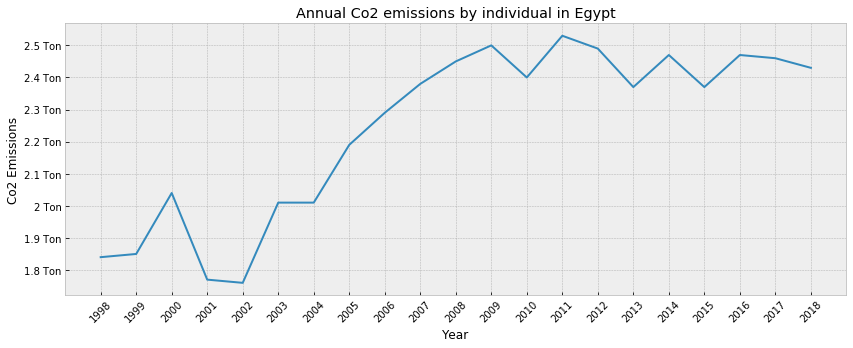

In [17]:
plt.style.use('bmh')
fig,ax=plt.subplots(figsize=(14,5))
ax.plot(df_egypt['year'],df_egypt['co2_emissions'])
ax.set_xlabel('Year')
ax.set_ylabel('Co2 Emissions')
plt.xticks(rotation=45)
plt.yticks([1.8,1.9,2.0,2.1,2.2,2.3,2.4,2.5],['1.8 Ton','1.9 Ton','2 Ton','2.1 Ton','2.2 Ton','2.3 Ton','2.4 Ton','2.5 Ton'])
plt.title('Annual Co2 emissions by individual in Egypt')
plt.show()

### The Annual co2 Emissions by individuals is increasing in egypt from the period from 1998 to 2018

In [18]:
egy_min_co2=np.min(df_egypt['co2_emissions'])
display(egy_min_co2)
egy_max_co2=np.max(df_egypt['co2_emissions'])
egy_max_co2

1.76

2.53

### As shown the minimum amount of co2 emissions by indviduals in egypt was 1.76 Ton and the maximum was 2.53 Ton, now let's see what is the year that had the lowest and the highest amounts of co2 

In [19]:
df_egypt[df_egypt['co2_emissions']==np.max(df_egypt['co2_emissions'])]

,country,year,co2_emissions
2534,Egypt,2011,2.53


> The Year that has the highest annual co2 emissions from 1998 to 2018 in Egypt is 2011

In [20]:
df_egypt[df_egypt['co2_emissions']==np.min(df_egypt['co2_emissions'])]

,country,year,co2_emissions
815,Egypt,2002,1.76


> The Year that has the lowest annual co2 emissions from 1998 to 2018 in Egypt is 2002

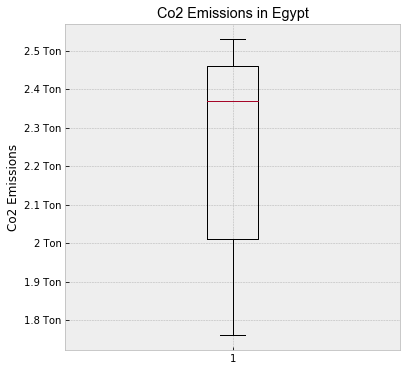

In [21]:
fig,ax=plt.subplots(figsize=(6,6))
ax.boxplot(df_egypt['co2_emissions'])
ax.set_ylabel('Co2 Emissions')
plt.title('Co2 Emissions in Egypt',fontname='arial')
plt.yticks([1.8,1.9,2.0,2.1,2.2,2.3,2.4,2.5],['1.8 Ton','1.9 Ton','2 Ton','2.1 Ton','2.2 Ton','2.3 Ton','2.4 Ton','2.5 Ton'])
plt.show()

In [92]:
egypt_mean=round(np.median(df_egypt['co2_emissions']),2)
print('Avergae Annual Co2 Emissions by Individuals In Egypt is {} Ton'.format(egypt_mean))

Avergae Annual Co2 Emissions by Individuals In Egypt is 2.37 Ton


--------

In [23]:
df_germany=df_co2_clean.query('country=="Germany"')

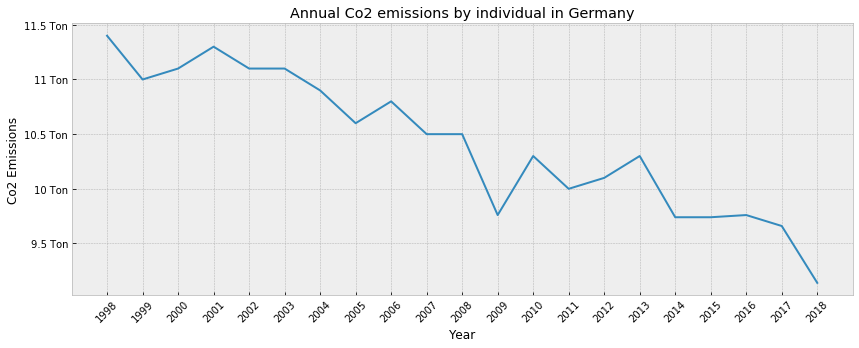

In [24]:
fig,ax=plt.subplots(figsize=(14,5))
ax.plot(df_germany['year'],df_germany['co2_emissions'])
ax.set_xlabel('Year')
ax.set_ylabel('Co2 Emissions')
plt.xticks(rotation=45)
plt.yticks([9.5,10.0,10.5,11.0,11.5],['9.5 Ton','10 Ton','10.5 Ton','11 Ton','11.5 Ton'])
plt.title('Annual Co2 emissions by individual in Germany')
plt.show()

### The Annual co2 emissions is decreasing in germany from 1998 to 2019

In [25]:
germany_min_co2=np.min(df_germany['co2_emissions'])
display(germany_min_co2)
germany_max_co2=np.max(df_germany['co2_emissions'])
germany_max_co2

9.14

11.4

### As shown the minimum amount of co2 emissions by indviduals in germany was 9.14 Ton and the maximum was 11.4 Ton, now let's see what is the year that had the lowest and the highest amounts of co2 

In [26]:
df_germany[df_germany['co2_emissions']==np.max(df_germany['co2_emissions'])]

,country,year,co2_emissions
64,Germany,1998,11.4


> The Year that has the highest annual co2 emissions from 1998 to 2018 in Germany is 1998

In [27]:
df_germany[df_germany['co2_emissions']==np.min(df_germany['co2_emissions'])]

,country,year,co2_emissions
3884,Germany,2018,9.14


> The Year that has the lowest annual co2 emissions from 1998 to 2018 in Germany is 2018

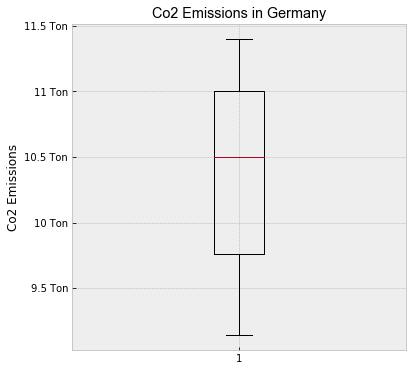

In [28]:
fig,ax=plt.subplots(figsize=(6,6))
ax.boxplot(df_germany['co2_emissions'])
ax.set_ylabel('Co2 Emissions')
plt.title('Co2 Emissions in Germany',fontname='arial')
plt.yticks([9.5,10.0,10.5,11.0,11.5],['9.5 Ton','10 Ton','10.5 Ton','11 Ton','11.5 Ton'])
plt.show()

In [93]:
germany_mean=round(np.median(df_germany['co2_emissions']),2)
print('Avergae Annual Co2 Emissions by Individual In Germany is {} Ton'.format(germany_mean))

Avergae Annual Co2 Emissions by Individual In Germany is 10.5 Ton


------

In [30]:
df_usa=df_co2_clean.query('country=="United States"')

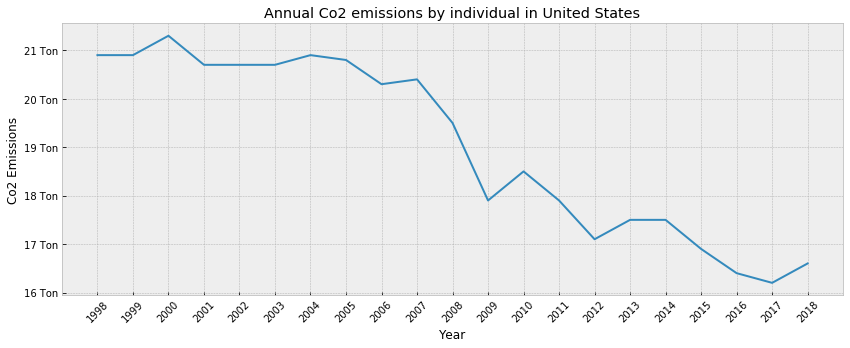

In [31]:
fig,ax=plt.subplots(figsize=(14,5))
ax.plot(df_usa['year'],df_usa['co2_emissions'])
ax.set_xlabel('Year')
ax.set_ylabel('Co2 Emissions')
plt.xticks(rotation=45)
plt.yticks([16,17,18,19,20,21],['16 Ton','17 Ton','18 Ton','19 Ton','20 Ton','21 Ton'])
plt.title('Annual Co2 emissions by individual in United States')
plt.show()

### The Annual co2 emissions by individuals in the United States is decreasing

In [52]:
usa_min_co2=np.min(df_usa['co2_emissions'])
display(usa_min_co2)
usa_max_co2=np.max(df_usa['co2_emissions'])
usa_max_co2

16.2

21.3

### As shown the minimum amount of co2 emissions by indviduals in USA was 16.2 Ton and the maximum was 21.3 Ton, now let's see what is the year that had the lowest and the highest amounts of co2 

In [32]:
df_usa[df_usa['co2_emissions']==np.max(df_usa['co2_emissions'])]

,country,year,co2_emissions
564,United States,2000,21.3


> The Year that has the highest annual co2 emissions from 1998 to 2018 in The United States is 2000

In [33]:
df_usa[df_usa['co2_emissions']==np.min(df_usa['co2_emissions'])]

,country,year,co2_emissions
3811,United States,2017,16.2


> The Year that has the highest annual co2 emissions from 1998 to 2018 in The United States is 2017

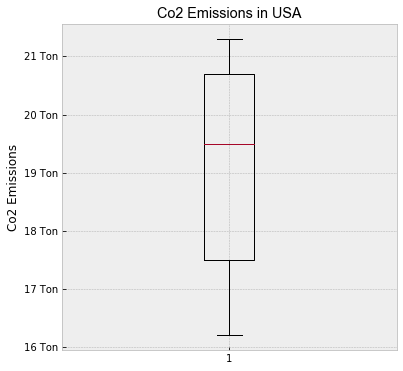

In [37]:
fig,ax=plt.subplots(figsize=(6,6))
ax.boxplot(df_usa['co2_emissions'])
ax.set_ylabel('Co2 Emissions')
plt.title('Co2 Emissions in USA',fontname='arial')
plt.yticks([16,17,18,19,20,21],['16 Ton','17 Ton','18 Ton','19 Ton','20 Ton','21 Ton'])
plt.show()

In [38]:
usa_mean=round(np.median(df_usa['co2_emissions']),2)
print('Avergae Annual Co2 Emissions by Individual In The United States is {} Ton'.format(usa_mean))

Avergae Annual Co2 Emissions by Individual In The United States is 19.5 Ton


------------------

In [39]:
df_china=df_co2_clean.query('country=="China"')

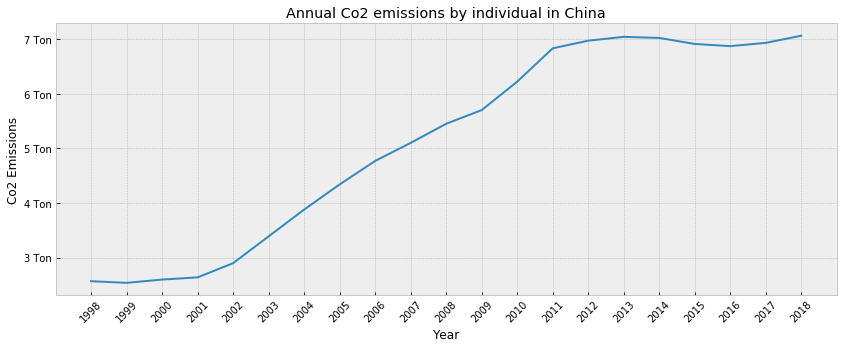

In [40]:
fig,ax=plt.subplots(figsize=(14,5))
ax.plot(df_china['year'],df_china['co2_emissions'])
ax.set_xlabel('Year')
ax.set_ylabel('Co2 Emissions')
plt.xticks(rotation=45)
plt.yticks([3,4,5,6,7],['3 Ton','4 Ton','5 Ton','6 Ton','7 Ton'])
plt.title('Annual Co2 emissions by individual in China')
plt.show()

### The Annual co2 emissions by individuals in the China is increasing

In [41]:
china_min_co2=np.min(df_china['co2_emissions'])
display(china_min_co2)
china_max_co2=np.max(df_china['co2_emissions'])
china_max_co2

2.54

7.06

### As shown the minimum amount of co2 emissions by indviduals in China was 2.54 Ton and the maximum was 7.06 Ton, now let's see what is the year that had the lowest and the highest amounts of co2 

In [42]:
df_china[df_china['co2_emissions']==np.max(df_china['co2_emissions'])]

,country,year,co2_emissions
3855,China,2018,7.06


> The Year that has the highest annual co2 emissions from 1998 to 2018 in China is 2018

In [43]:
df_china[df_china['co2_emissions']==np.min(df_china['co2_emissions'])]

,country,year,co2_emissions
226,China,1999,2.54


> The Year that has the lowest annual co2 emissions from 1998 to 2018 in China is 1999

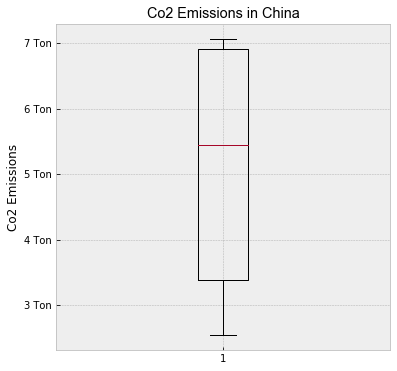

In [46]:
fig,ax=plt.subplots(figsize=(6,6))
ax.boxplot(df_china['co2_emissions'])
ax.set_ylabel('Co2 Emissions')
plt.title('Co2 Emissions in China',fontname='arial')
plt.yticks([3,4,5,6,7],['3 Ton','4 Ton','5 Ton','6 Ton','7 Ton'])
plt.show()

In [45]:
china_mean=round(np.median(df_china['co2_emissions']),2)
print('Avergae Annual Co2 Emissions by Individual In China is {} Ton'.format(china_mean))

Avergae Annual Co2 Emissions by Individual In China is 5.45 Ton


------

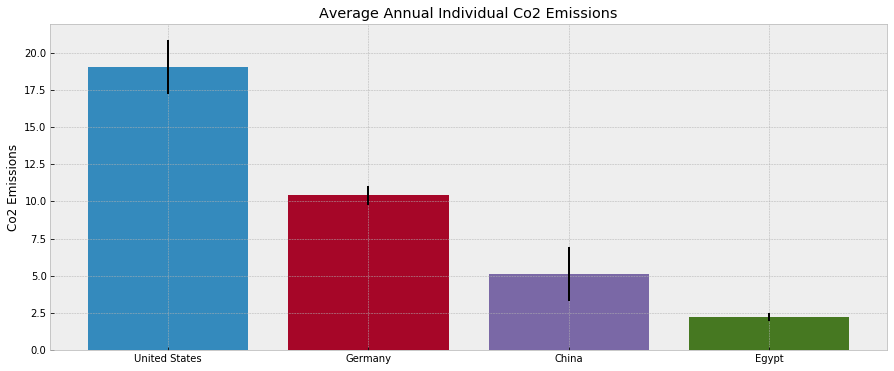

In [52]:
countries=['United States','Germany','China','Egypt']
fig,ax=plt.subplots(figsize=(15,6))
for country in countries:
    df_final=df_co2_clean[df_co2_clean['country']==country]
    ax.bar(country,df_final['co2_emissions'].mean(),yerr=df_final['co2_emissions'].std())
ax.set_ylabel('Co2 Emissions')
plt.title('Average Annual Individual Co2 Emissions')
plt.show()

### Although the annual co2 emissions by individuals in both USA and Germany is decreasing, they still have a high amount of co2 emissions

---------------------

----

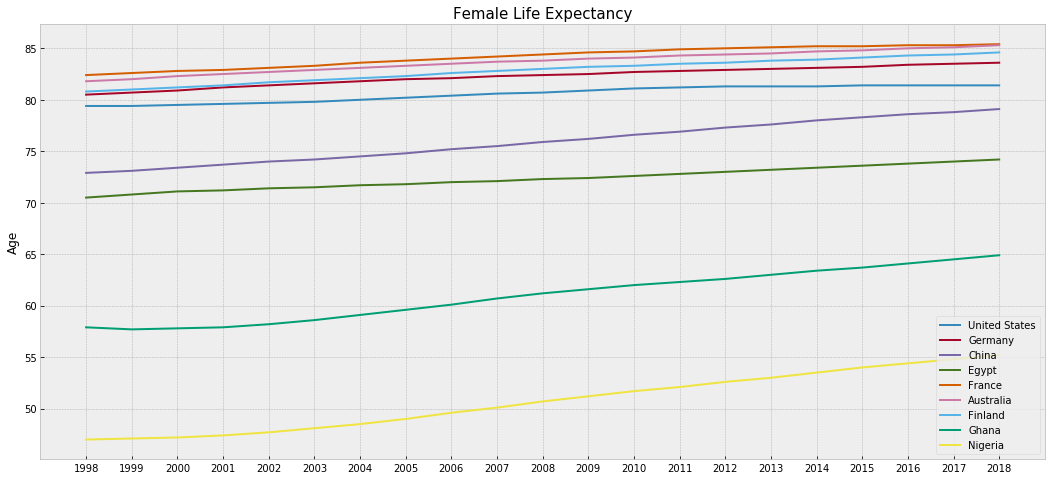

In [91]:
countries=['United States','Germany','China','Egypt','France','Australia','Finland','Ghana','Nigeria']
fig,ax=plt.subplots(figsize=(18,8))
for country in countries:
    df_final_female=df_female_clean[df_female_clean['country']==country]
    ax.plot(df_final_female['year'],df_final_female['Female_life_expectancy'])
ax.set_ylabel('Age')
plt.title('Female Life Expectancy',fontsize=15)
ax.legend(countries)
plt.show()

### Overall the expected age for females in these different countris is increasing, but there is a big gap between different countries

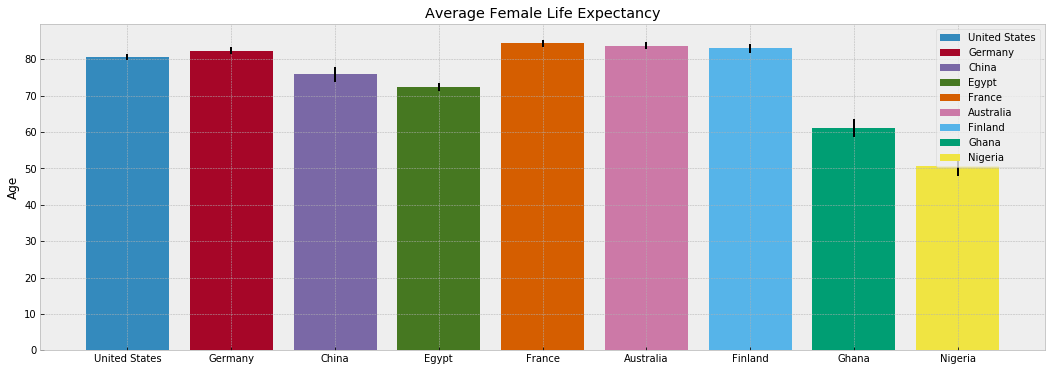

In [65]:
fig,ax=plt.subplots(figsize=(18,6))
for country in countries:
    df_final_female=df_female_clean[df_female_clean['country']==country]
    ax.bar(country,df_final_female['Female_life_expectancy'].median(),yerr=df_final_female['Female_life_expectancy'].std())
ax.set_ylabel('Age')
plt.title('Average Female Life Expectancy')
ax.legend(countries)
plt.show()

### There is a big gap between the Avegrage Expected life of females in countries devloping countries like Egypt,Nigeria, Ghana and developed countries like France, Germany, Finland and USA

In [70]:
for country in countries:
    df_final_female=df_female_clean[df_female_clean['country']==country]
    x=np.median(df_final_female['Female_life_expectancy'])
    print('Expected Life of females in: {} is {} years old'.format(country,x))

Expected Life of females in: United States is 80.7 years old
Expected Life of females in: Germany is 82.4 years old
Expected Life of females in: China is 75.9 years old
Expected Life of females in: Egypt is 72.3 years old
Expected Life of females in: France is 84.4 years old
Expected Life of females in: Australia is 83.8 years old
Expected Life of females in: Finland is 83.0 years old
Expected Life of females in: Ghana is 61.2 years old
Expected Life of females in: Nigeria is 50.7 years old


> There is a 30 year gap between the expected life of a woman in Nigeria and a woman in the United States

---

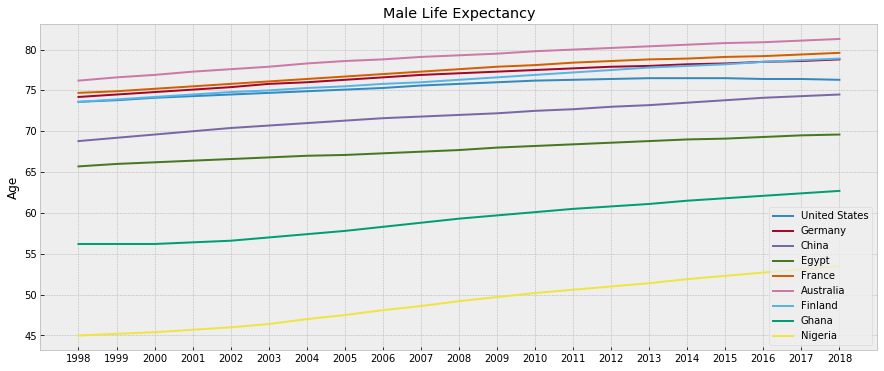

In [71]:
fig,ax=plt.subplots(figsize=(15,6))
for country in countries:
    df_final_male=df_male_clean[df_male_clean['country']==country]
    ax.plot(df_final_male['year'],df_final_male['Male_life_expectancy'])
ax.set_ylabel('Age')
plt.title('Male Life Expectancy')
ax.legend(countries)
plt.show()

### The expected age for Males in these different countris is increasing, but there is a big gap between developed and developing countries

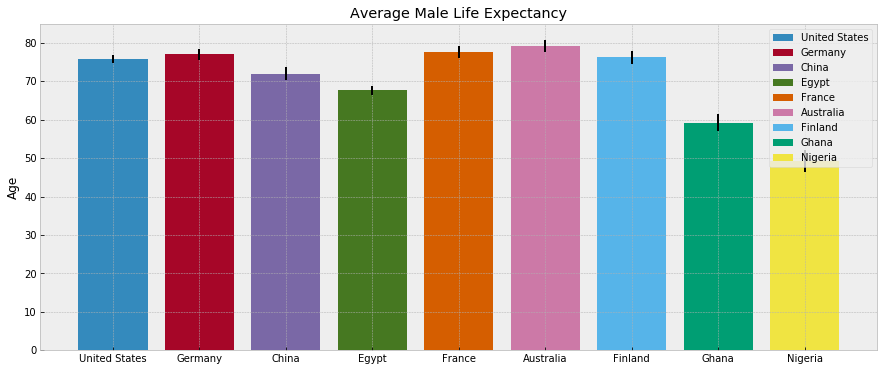

In [76]:
fig,ax=plt.subplots(figsize=(15,6))
for country in countries:
    df_final_male=df_male_clean[df_male_clean['country']==country]
    ax.bar(country,df_final_male['Male_life_expectancy'].median(),yerr=df_final_male['Male_life_expectancy'].std())
ax.set_ylabel('Age')
plt.title('Average Male Life Expectancy')
ax.legend(countries)
plt.show()

### There is a big gap between the Avegrage Expected life of Males in countries devloping countries like Egypt,Nigeria, Ghana and developed countries like France, Germany, Finland and USA

In [75]:
for country in countries:
    df_final_male=df_male_clean[df_male_clean['country']==country]
    y=np.median(df_final_male['Male_life_expectancy'])
    print('Expected Life of Males in: {} is {} years old'.format(country,y))

Expected Life of Males in: United States is 75.8 years old
Expected Life of Males in: Germany is 77.1 years old
Expected Life of Males in: China is 72.0 years old
Expected Life of Males in: Egypt is 67.7 years old
Expected Life of Males in: France is 77.6 years old
Expected Life of Males in: Australia is 79.3 years old
Expected Life of Males in: Finland is 76.3 years old
Expected Life of Males in: Ghana is 59.3 years old
Expected Life of Males in: Nigeria is 49.2 years old


> There is a 30 year gap between the expected life of men in Nigeria and men in Australia

In [79]:
df_combined=df_male_clean.merge(df_female_clean,on=['year','country'])

In [80]:
df_combined.head()

,country,year,Male_life_expectancy,Female_life_expectancy
0,Afghanistan,1998,53.8,56.2
1,Albania,1998,70.4,76.3
2,Algeria,1998,68.3,71.2
3,Angola,1998,43.8,47.9
4,Antigua and Barbuda,1998,71.9,74.9


In [85]:
df_comb_new=df_combined[df_combined['country'].isin(countries)]
male_life=np.median(df_comb_new['Male_life_expectancy'])
display(male_life)
female_life=np.median(df_comb_new['Female_life_expectancy'])
female_life

74.5

80.6

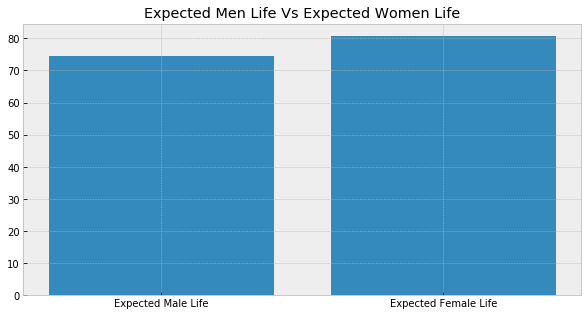

In [90]:
fig,ax = plt.subplots(figsize=(10,5))
data=[male_life,female_life]
names=['Expected Male Life','Expected Female Life']
ax.bar(names,data)
plt.title('Expected Men Life Vs Expected Women Life')
plt.show()

- Women Live longer than Men

## Conclusion

### Results

> Co2 Emissions Analysis Section
- 1- Co2 Emission by individuals is increasing in countries like Egypt and China, but this increase in egypt is very slight
- 2- Co2 Emission by individuals is decreasing in Germany from 1998 to 2018, it dropped down from 11.4 Ton at 1998 to 9.14 Ton at 2018 
- 3- Co2 Emission by individuals in the United States dropped down from 21.3 Ton at 1999 to 16.2 Ton at 2018
- 4- The Annual Co2 Emissions by individuals in China increased by 4.5 Ton and the highest record is at 2018 is 7.06 Ton
- 5- The Very big number of population of china could explain why the annual co2 emissions of individuals in china is smaller than a country like germany, or even the United States

----

> Expected Life Analysis Section
- 1- There is a huge gap between the expected life of both men and women in developed countries like Nigeria and Ghana, and Devloping Countries like Australia and France
- 2- There is no big difference between the expected life among people who live in developed countries, but there is a difference between the expected life of people in different develing countries as the expected life of females in Egypt is 72.3 while it is 50.7 in Nigeria
- 3- On average Women live longer than Men by 6 years 

### Limitations

- The Co2 Emissions by indviduals doesn't have the number of population for each country, and so we can't compare between the situation in different countries as we have a country like china that has more than 1 Billion person while germany doesn't exceed 80 million person, and so it not a representative data

- The Expected life data doesn't have any other variables that is related to the expected life like the availablity of a good health system or clean water